In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import os
import glob
import pandas as pd
import re
import math

In [2]:
import glob
files=glob.glob("*.csv")

In [3]:
files

['DatosPoblacion.csv']

In [4]:
data1=pd.read_csv(files[0],usecols=[1,2,3,4,5,6,7,8,9,10,11,12])
data1

,Suma de Total 2005,Suma de Hombres 2005,Suma de Mujeres 2005,Suma de Total 2010,Suma de Hombres 2010,Suma de Mujeres 2010,Suma de Total 2015,Suma de Hombres 2015,Suma de Mujeres 2015,Suma de Total 2020,Suma de Hombres 2020,Suma de Mujeres 2020
0,944285,456533,487752,1065416,515364,550052,1184996,576638,608358,1425607,696683,728924
1,2487367,1252581,1234786,2844469,1431789,1412680,3155070,1591610,1563460,3769020,1900589,1868431
2,424041,216250,207791,512170,261288,250882,637026,325433,311593,798447,405879,392568
3,690689,344334,346355,754730,373457,381273,822441,407721,414720,928363,456939,471424
4,3920892,1941880,1979012,4293459,2108830,2184629,4796580,2352807,2443773,5543828,2705947,2837881
5,3052907,1519972,1532935,3241444,1610275,1631169,3406465,1692545,1713920,3741869,1853822,1888047
6,8605239,4110485,4494754,8720916,4171683,4549233,8851080,4233783,4617297,9209944,4404927,4805017
7,2298070,1140195,1157875,2495200,1236880,1258320,2748391,1364197,1384194,3146771,1563669,1583102
8,542627,268192,274435,567996,280005,287991,650555,322790,327765,731391,360622,370769
9,1448661,709521,739140,1509117,738095,771022,1632934,803890,829044,1832650,904866,927784


In [5]:
dataTotal=pd.read_csv(files[0],usecols=[1,4,7,10])
dataTotal

,Suma de Total 2005,Suma de Total 2010,Suma de Total 2015,Suma de Total 2020
0,944285,1065416,1184996,1425607
1,2487367,2844469,3155070,3769020
2,424041,512170,637026,798447
3,690689,754730,822441,928363
4,3920892,4293459,4796580,5543828
5,3052907,3241444,3406465,3741869
6,8605239,8720916,8851080,9209944
7,2298070,2495200,2748391,3146771
8,542627,567996,650555,731391
9,1448661,1509117,1632934,1832650


In [6]:
dataHombres=pd.read_csv(files[0],usecols=[2,5,8,11])
dataHombres

,Suma de Hombres 2005,Suma de Hombres 2010,Suma de Hombres 2015,Suma de Hombres 2020
0,456533,515364,576638,696683
1,1252581,1431789,1591610,1900589
2,216250,261288,325433,405879
3,344334,373457,407721,456939
4,1941880,2108830,2352807,2705947
5,1519972,1610275,1692545,1853822
6,4110485,4171683,4233783,4404927
7,1140195,1236880,1364197,1563669
8,268192,280005,322790,360622
9,709521,738095,803890,904866


In [7]:
dataMujeres=pd.read_csv(files[0],usecols=[3,6,9,12])
dataMujeres

,Suma de Mujeres 2005,Suma de Mujeres 2010,Suma de Mujeres 2015,Suma de Mujeres 2020
0,487752,550052,608358,728924
1,1234786,1412680,1563460,1868431
2,207791,250882,311593,392568
3,346355,381273,414720,471424
4,1979012,2184629,2443773,2837881
5,1532935,1631169,1713920,1888047
6,4494754,4549233,4617297,4805017
7,1157875,1258320,1384194,1583102
8,274435,287991,327765,370769
9,739140,771022,829044,927784


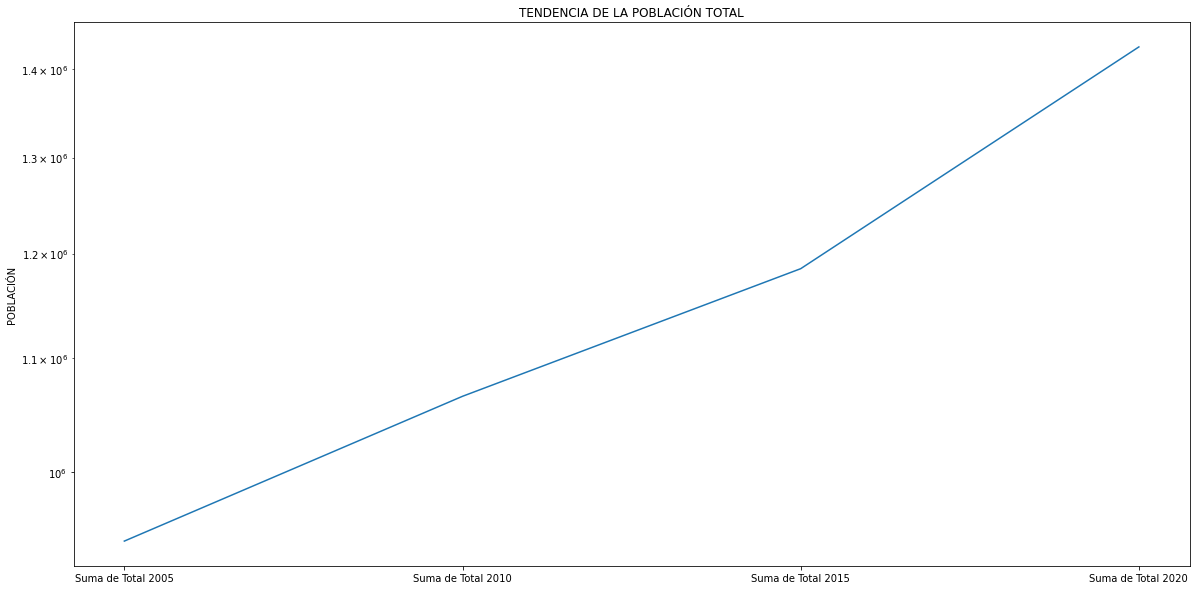

In [8]:
plt.figure(figsize=(20,10))
for i in range (1):
    plt.plot(dataTotal.iloc[i])
    plt.yscale('log')
    
plt.title("TENDENCIA DE LA POBLACIÓN TOTAL")
plt.ylabel("POBLACIÓN")
plt.savefig('TendenciaTotal.jpg')

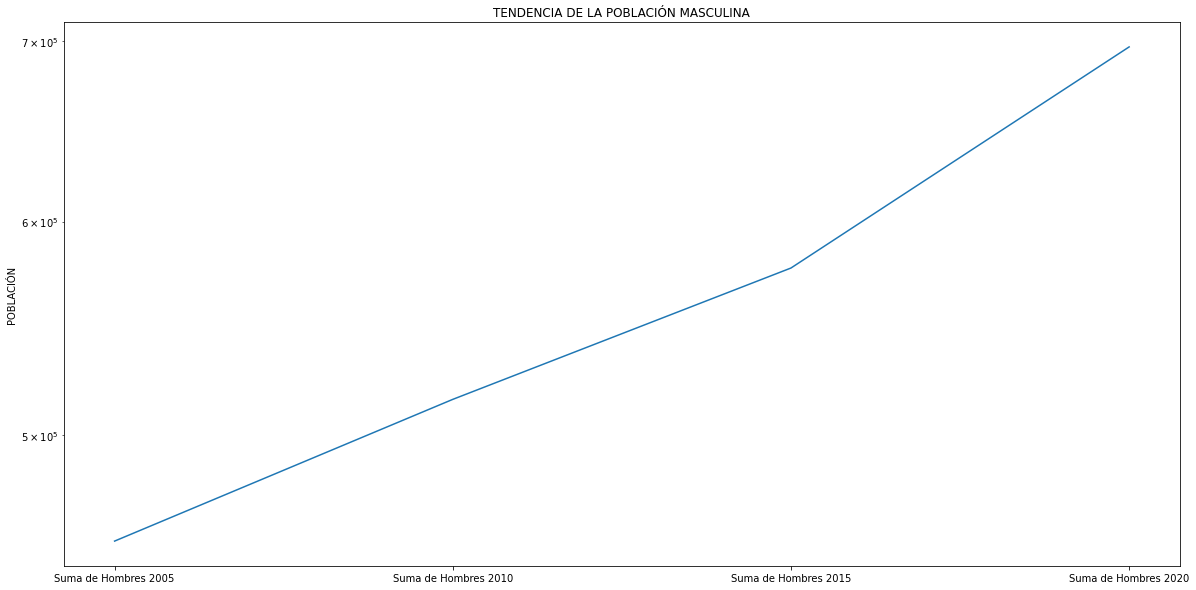

In [9]:
plt.figure(figsize=(20,10))
for i in range (1):
    plt.plot(dataHombres.iloc[i])
    plt.yscale('log')
    
plt.title("TENDENCIA DE LA POBLACIÓN MASCULINA")
plt.ylabel("POBLACIÓN")
plt.savefig('TendenciaMas.jpg')

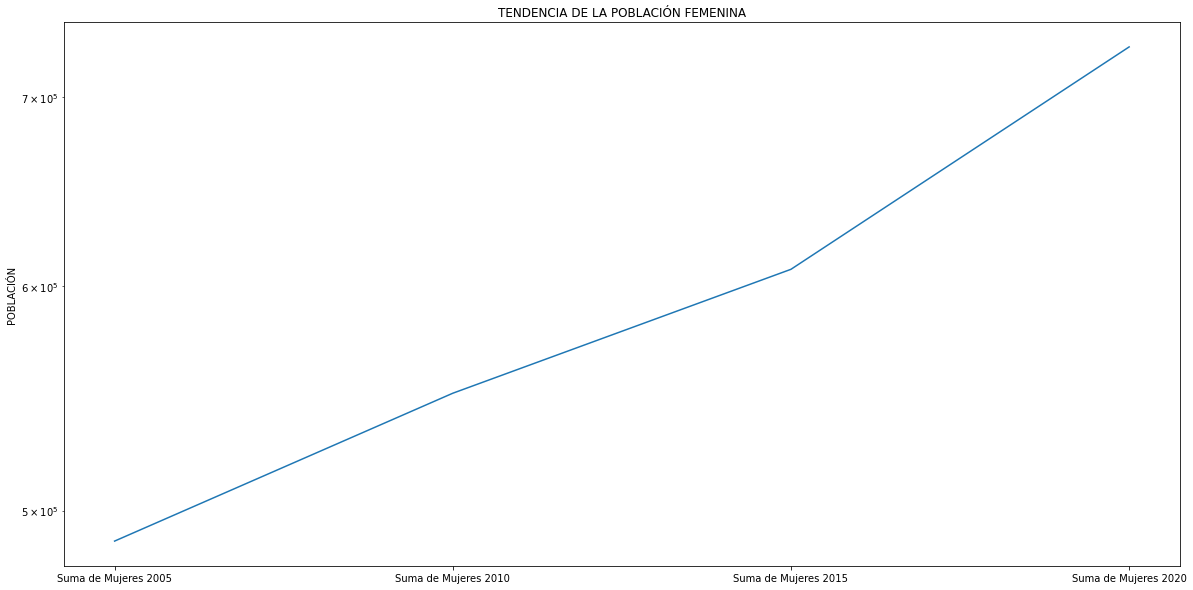

In [10]:
plt.figure(figsize=(20,10))
for i in range (1):
    plt.plot(dataMujeres.iloc[i])
    plt.yscale('log')

        
plt.title("TENDENCIA DE LA POBLACIÓN FEMENINA")
plt.ylabel("POBLACIÓN")
plt.savefig('TendenciaFem.jpg')

In [11]:
data1['Relacion H/M 2005']=data1['Suma de Hombres 2005']/data1['Suma de Mujeres 2005']
data1

,Suma de Total 2005,Suma de Hombres 2005,Suma de Mujeres 2005,Suma de Total 2010,Suma de Hombres 2010,Suma de Mujeres 2010,Suma de Total 2015,Suma de Hombres 2015,Suma de Mujeres 2015,Suma de Total 2020,Suma de Hombres 2020,Suma de Mujeres 2020,Relacion H/M 2005
0,944285,456533,487752,1065416,515364,550052,1184996,576638,608358,1425607,696683,728924,0.935994
1,2487367,1252581,1234786,2844469,1431789,1412680,3155070,1591610,1563460,3769020,1900589,1868431,1.014411
2,424041,216250,207791,512170,261288,250882,637026,325433,311593,798447,405879,392568,1.040709
3,690689,344334,346355,754730,373457,381273,822441,407721,414720,928363,456939,471424,0.994165
4,3920892,1941880,1979012,4293459,2108830,2184629,4796580,2352807,2443773,5543828,2705947,2837881,0.981237
5,3052907,1519972,1532935,3241444,1610275,1631169,3406465,1692545,1713920,3741869,1853822,1888047,0.991544
6,8605239,4110485,4494754,8720916,4171683,4549233,8851080,4233783,4617297,9209944,4404927,4805017,0.914507
7,2298070,1140195,1157875,2495200,1236880,1258320,2748391,1364197,1384194,3146771,1563669,1583102,0.984731
8,542627,268192,274435,567996,280005,287991,650555,322790,327765,731391,360622,370769,0.977251
9,1448661,709521,739140,1509117,738095,771022,1632934,803890,829044,1832650,904866,927784,0.959928


In [12]:
data1['Relacion H/M 2010']=data1['Suma de Hombres 2010']/data1['Suma de Mujeres 2010']
data1

,Suma de Total 2005,Suma de Hombres 2005,Suma de Mujeres 2005,Suma de Total 2010,Suma de Hombres 2010,Suma de Mujeres 2010,Suma de Total 2015,Suma de Hombres 2015,Suma de Mujeres 2015,Suma de Total 2020,Suma de Hombres 2020,Suma de Mujeres 2020,Relacion H/M 2005,Relacion H/M 2010
0,944285,456533,487752,1065416,515364,550052,1184996,576638,608358,1425607,696683,728924,0.935994,0.936937
1,2487367,1252581,1234786,2844469,1431789,1412680,3155070,1591610,1563460,3769020,1900589,1868431,1.014411,1.013527
2,424041,216250,207791,512170,261288,250882,637026,325433,311593,798447,405879,392568,1.040709,1.041478
3,690689,344334,346355,754730,373457,381273,822441,407721,414720,928363,456939,471424,0.994165,0.979500
4,3920892,1941880,1979012,4293459,2108830,2184629,4796580,2352807,2443773,5543828,2705947,2837881,0.981237,0.965303
5,3052907,1519972,1532935,3241444,1610275,1631169,3406465,1692545,1713920,3741869,1853822,1888047,0.991544,0.987191
6,8605239,4110485,4494754,8720916,4171683,4549233,8851080,4233783,4617297,9209944,4404927,4805017,0.914507,0.917008
7,2298070,1140195,1157875,2495200,1236880,1258320,2748391,1364197,1384194,3146771,1563669,1583102,0.984731,0.982961
8,542627,268192,274435,567996,280005,287991,650555,322790,327765,731391,360622,370769,0.977251,0.972270
9,1448661,709521,739140,1509117,738095,771022,1632934,803890,829044,1832650,904866,927784,0.959928,0.957294


In [13]:
data1['Relacion H/M 2015']=data1['Suma de Hombres 2015']/data1['Suma de Mujeres 2015']
data1

,Suma de Total 2005,Suma de Hombres 2005,Suma de Mujeres 2005,Suma de Total 2010,Suma de Hombres 2010,Suma de Mujeres 2010,Suma de Total 2015,Suma de Hombres 2015,Suma de Mujeres 2015,Suma de Total 2020,Suma de Hombres 2020,Suma de Mujeres 2020,Relacion H/M 2005,Relacion H/M 2010,Relacion H/M 2015
0,944285,456533,487752,1065416,515364,550052,1184996,576638,608358,1425607,696683,728924,0.935994,0.936937,0.947860
1,2487367,1252581,1234786,2844469,1431789,1412680,3155070,1591610,1563460,3769020,1900589,1868431,1.014411,1.013527,1.018005
2,424041,216250,207791,512170,261288,250882,637026,325433,311593,798447,405879,392568,1.040709,1.041478,1.044417
3,690689,344334,346355,754730,373457,381273,822441,407721,414720,928363,456939,471424,0.994165,0.979500,0.983124
4,3920892,1941880,1979012,4293459,2108830,2184629,4796580,2352807,2443773,5543828,2705947,2837881,0.981237,0.965303,0.962776
5,3052907,1519972,1532935,3241444,1610275,1631169,3406465,1692545,1713920,3741869,1853822,1888047,0.991544,0.987191,0.987529
6,8605239,4110485,4494754,8720916,4171683,4549233,8851080,4233783,4617297,9209944,4404927,4805017,0.914507,0.917008,0.916940
7,2298070,1140195,1157875,2495200,1236880,1258320,2748391,1364197,1384194,3146771,1563669,1583102,0.984731,0.982961,0.985553
8,542627,268192,274435,567996,280005,287991,650555,322790,327765,731391,360622,370769,0.977251,0.972270,0.984821
9,1448661,709521,739140,1509117,738095,771022,1632934,803890,829044,1832650,904866,927784,0.959928,0.957294,0.969659


In [14]:
data1['Relacion H/M 2020']=data1['Suma de Hombres 2020']/data1['Suma de Mujeres 2020']
data1

,Suma de Total 2005,Suma de Hombres 2005,Suma de Mujeres 2005,Suma de Total 2010,Suma de Hombres 2010,Suma de Mujeres 2010,Suma de Total 2015,Suma de Hombres 2015,Suma de Mujeres 2015,Suma de Total 2020,Suma de Hombres 2020,Suma de Mujeres 2020,Relacion H/M 2005,Relacion H/M 2010,Relacion H/M 2015,Relacion H/M 2020
0,944285,456533,487752,1065416,515364,550052,1184996,576638,608358,1425607,696683,728924,0.935994,0.936937,0.947860,0.955769
1,2487367,1252581,1234786,2844469,1431789,1412680,3155070,1591610,1563460,3769020,1900589,1868431,1.014411,1.013527,1.018005,1.017211
2,424041,216250,207791,512170,261288,250882,637026,325433,311593,798447,405879,392568,1.040709,1.041478,1.044417,1.033908
3,690689,344334,346355,754730,373457,381273,822441,407721,414720,928363,456939,471424,0.994165,0.979500,0.983124,0.969274
4,3920892,1941880,1979012,4293459,2108830,2184629,4796580,2352807,2443773,5543828,2705947,2837881,0.981237,0.965303,0.962776,0.953510
5,3052907,1519972,1532935,3241444,1610275,1631169,3406465,1692545,1713920,3741869,1853822,1888047,0.991544,0.987191,0.987529,0.981873
6,8605239,4110485,4494754,8720916,4171683,4549233,8851080,4233783,4617297,9209944,4404927,4805017,0.914507,0.917008,0.916940,0.916735
7,2298070,1140195,1157875,2495200,1236880,1258320,2748391,1364197,1384194,3146771,1563669,1583102,0.984731,0.982961,0.985553,0.987725
8,542627,268192,274435,567996,280005,287991,650555,322790,327765,731391,360622,370769,0.977251,0.972270,0.984821,0.972633
9,1448661,709521,739140,1509117,738095,771022,1632934,803890,829044,1832650,904866,927784,0.959928,0.957294,0.969659,0.975298


In [15]:
personasTotal=np.asarray(dataTotal)
personasTotal[0]

array([ 944285, 1065416, 1184996, 1425607], dtype=int64)

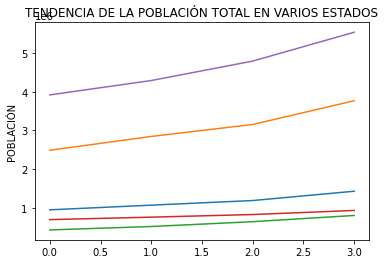

In [16]:
for i in range(5):
    plt.plot(personasTotal[i])
plt.title("TENDENCIA DE LA POBLACIÓN TOTAL EN VARIOS ESTADOS")
plt.ylabel("POBLACIÓN")
plt.savefig('TendenciaTotVarios.jpg')

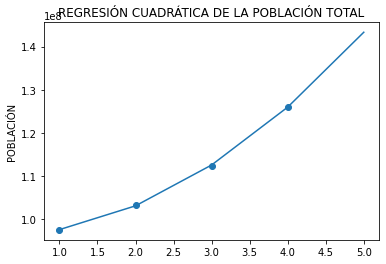

           2
1.974e+06 x - 4.054e+05 x + 9.598e+07


In [17]:
plt.title("REGRESIÓN CUADRÁTICA DE LA POBLACIÓN TOTAL")
plt.ylabel("POBLACIÓN")
TotalGeneralTotal=[dataTotal['Suma de Total 2005'].sum(),dataTotal['Suma de Total 2010'].sum(),dataTotal['Suma de Total 2015'].sum(),dataTotal['Suma de Total 2020'].sum()]
x=[1,2,3,4]
TotalGeneralTotal
model = np.poly1d(np.polyfit(x, TotalGeneralTotal, 2))
polyline = np.linspace(1, 5, 5)
plt.scatter(x,TotalGeneralTotal)
plt.plot(polyline, model(polyline))
plt.savefig('RegTotal.jpg')
plt.show()


print(model)


In [18]:
RelPobTot=(1.974e+06*(25)-4.054e+05*(5)+9.598e+07)/dataTotal['Suma de Total 2020'].sum()
dataTotal['Prediccion 2025']=dataTotal['Suma de Total 2020']*RelPobTot
dataTotal


,Suma de Total 2005,Suma de Total 2010,Suma de Total 2015,Suma de Total 2020,Prediccion 2025
0,944285,1065416,1184996,1425607,1.621199e+06
1,2487367,2844469,3155070,3769020,4.286125e+06
2,424041,512170,637026,798447,9.079930e+05
3,690689,754730,822441,928363,1.055733e+06
4,3920892,4293459,4796580,5543828,6.304435e+06
5,3052907,3241444,3406465,3741869,4.255249e+06
6,8605239,8720916,8851080,9209944,1.047354e+07
7,2298070,2495200,2748391,3146771,3.578504e+06
8,542627,567996,650555,731391,8.317370e+05
9,1448661,1509117,1632934,1832650,2.084087e+06


In [19]:
dataTotal['Prediccion 2025'].sum()

143302999.99999997

In [20]:
dataTotal['Prediccion 2025'].sum()-dataTotal['Suma de Total 2020'].sum()

17288975.99999997

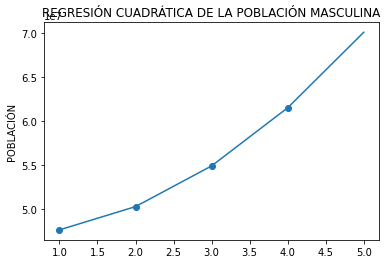

           2
9.901e+05 x - 3.257e+05 x + 4.693e+07


In [21]:
plt.title("REGRESIÓN CUADRÁTICA DE LA POBLACIÓN MASCULINA")
plt.ylabel("POBLACIÓN")
TotalGeneralHombres=[dataHombres['Suma de Hombres 2005'].sum(),dataHombres['Suma de Hombres 2010'].sum(),dataHombres['Suma de Hombres 2015'].sum(),dataHombres['Suma de Hombres 2020'].sum()]
TotalGeneralHombres
model1 = np.poly1d(np.polyfit(x, TotalGeneralHombres, 2))
plt.scatter(x,TotalGeneralHombres)
plt.plot(polyline, model1(polyline))
plt.savefig('RegMAS.jpg')
plt.show()
print(model1)

In [22]:
RelPobHom=(9.901e+05*(25) - 3.257e+05*(5) + 4.693e+07)/dataHombres['Suma de Hombres 2020'].sum()
dataHombres['Prediccion 2025']=dataHombres['Suma de Hombres 2020']*RelPobHom
dataHombres

,Suma de Hombres 2005,Suma de Hombres 2010,Suma de Hombres 2015,Suma de Hombres 2020,Prediccion 2025
0,456533,515364,576638,696683,7.939278e+05
1,1252581,1431789,1591610,1900589,2.165878e+06
2,216250,261288,325433,405879,4.625326e+05
3,344334,373457,407721,456939,5.207197e+05
4,1941880,2108830,2352807,2705947,3.083650e+06
5,1519972,1610275,1692545,1853822,2.112583e+06
6,4110485,4171683,4233783,4404927,5.019778e+06
7,1140195,1236880,1364197,1563669,1.781930e+06
8,268192,280005,322790,360622,4.109585e+05
9,709521,738095,803890,904866,1.031169e+06


In [23]:
dataHombres['Prediccion 2025'].sum()

70054000.0

In [24]:
dataHombres['Prediccion 2025'].sum()-dataHombres['Suma de Hombres 2020'].sum()

8580610.0

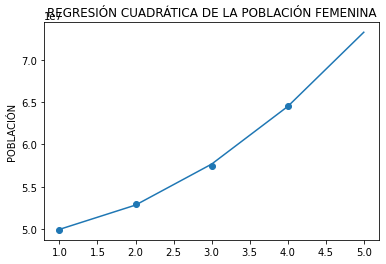

           2
9.843e+05 x - 7.969e+04 x + 4.905e+07


In [25]:
plt.title("REGRESIÓN CUADRÁTICA DE LA POBLACIÓN FEMENINA")
plt.ylabel("POBLACIÓN")
TotalGeneralMujeres=[dataMujeres['Suma de Mujeres 2005'].sum(),dataMujeres['Suma de Mujeres 2010'].sum(),dataMujeres['Suma de Mujeres 2015'].sum(),dataMujeres['Suma de Mujeres 2020'].sum()]
TotalGeneralMujeres
model2 = np.poly1d(np.polyfit(x, TotalGeneralMujeres, 2))
plt.scatter(x,TotalGeneralMujeres)
plt.plot(polyline, model2(polyline))
plt.savefig('RegFEM.jpg')
plt.show()
print(model2)

In [26]:
RelPobMuj=(9.843e+05*(25) - 7.969e+04*(5) + 4.905e+07)/dataMujeres['Suma de Mujeres 2020'].sum()
dataMujeres['Prediccion 2025']=dataMujeres['Suma de Mujeres 2020']*RelPobMuj
dataMujeres

,Suma de Mujeres 2005,Suma de Mujeres 2010,Suma de Mujeres 2015,Suma de Mujeres 2020,Prediccion 2025
0,487752,550052,608358,728924,8.273901e+05
1,1234786,1412680,1563460,1868431,2.120826e+06
2,207791,250882,311593,392568,4.455977e+05
3,346355,381273,414720,471424,5.351059e+05
4,1979012,2184629,2443773,2837881,3.221234e+06
5,1532935,1631169,1713920,1888047,2.143092e+06
6,4494754,4549233,4617297,4805017,5.454099e+06
7,1157875,1258320,1384194,1583102,1.796954e+06
8,274435,287991,327765,370769,4.208540e+05
9,739140,771022,829044,927784,1.053113e+06


In [27]:
dataMujeres['Prediccion 2025'].sum()

73259050.0

In [28]:
dataMujeres['Prediccion 2025'].sum()-dataMujeres['Suma de Mujeres 2020'].sum()

8718416.0

In [29]:
dataMujeres['Prediccion 2025'].sum()-dataHombres['Prediccion 2025'].sum()

3205050.0